<a href="https://colab.research.google.com/github/Dilpreet-S/AIT-590-Programming-Assignments/blob/master/590Projectupdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding Data**


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("/content/sentiment_result_updated.csv")

data1= pd.read_csv("/content/sentiment_result_updated.csv")

In [3]:
data.shape

(120016, 18)

In [4]:
data.head()

,Category,Reservation,Noise Level,WiFi,Trendy,Upscale,Casual,Good For Groups,Good For Kids,Alcohol,Delivery,Takeout,Price Range,Emotion,WiFi T/F,Alcohol T/F,Unnamed: 16,Unnamed: 17
0,nightlife,True,average,free,False,False,True,True,True,full bar,False,True,2.0,negative,True,True,NaN,NaN
1,american,True,average,free,False,False,True,True,True,full bar,False,True,2.0,negative,True,True,NaN,NaN
2,bars,True,average,free,False,False,True,True,True,full bar,False,True,2.0,negative,True,True,NaN,NaN
3,sandwiches,False,loud,no,False,False,True,True,True,no,False,True,1.0,neutral,False,False,NaN,NaN
4,sandwiches,False,average,no,False,False,True,True,True,no,True,True,1.0,neutral,False,False,NaN,NaN


In [5]:
# Removing Unwanted Column

data=data.drop(columns=['Unnamed: 16','Unnamed: 17','WiFi','Alcohol'])
data1=data1.drop(columns=['Unnamed: 16','Unnamed: 17'])


In [6]:
data.shape

(120016, 14)

In [7]:
data.dtypes

Category            object
Reservation         object
Noise Level         object
Trendy              object
Upscale             object
Casual              object
Good For Groups     object
Good For Kids       object
Delivery            object
Takeout             object
Price Range        float64
Emotion             object
WiFi T/F            object
Alcohol T/F         object
dtype: object

** Missing Values**

In [8]:
import missingno as msno

In [9]:
data.isna().sum()

Category              0
Reservation        2133
Noise Level        3470
Trendy             7342
Upscale            5481
Casual             4938
Good For Groups    1453
Good For Kids       847
Delivery           3713
Takeout            1939
Price Range         598
Emotion               1
WiFi T/F           2606
Alcohol T/F        1930
dtype: int64

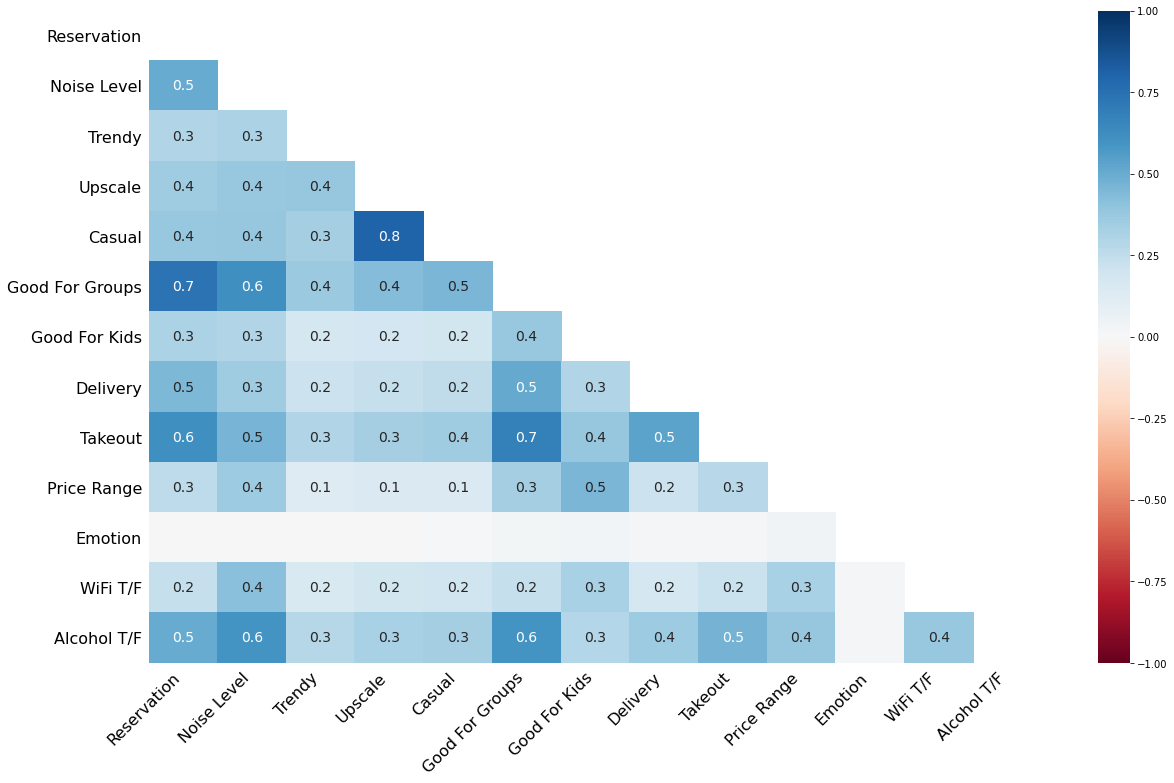

In [10]:
msno.heatmap(data)

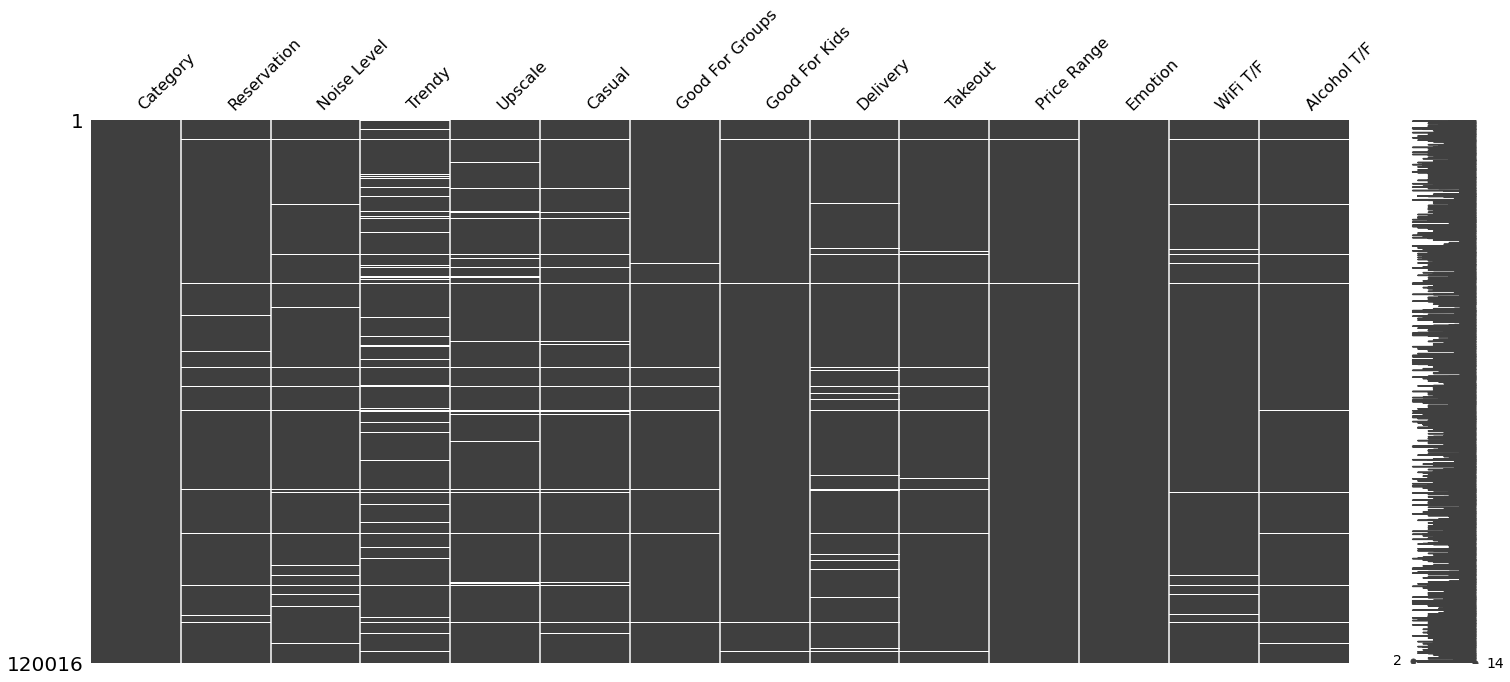

In [11]:
msno.matrix(data)

In [12]:
data=data.dropna(axis=0)
data1=data1.dropna(axis=0)

In [13]:
data.shape

(103141, 14)

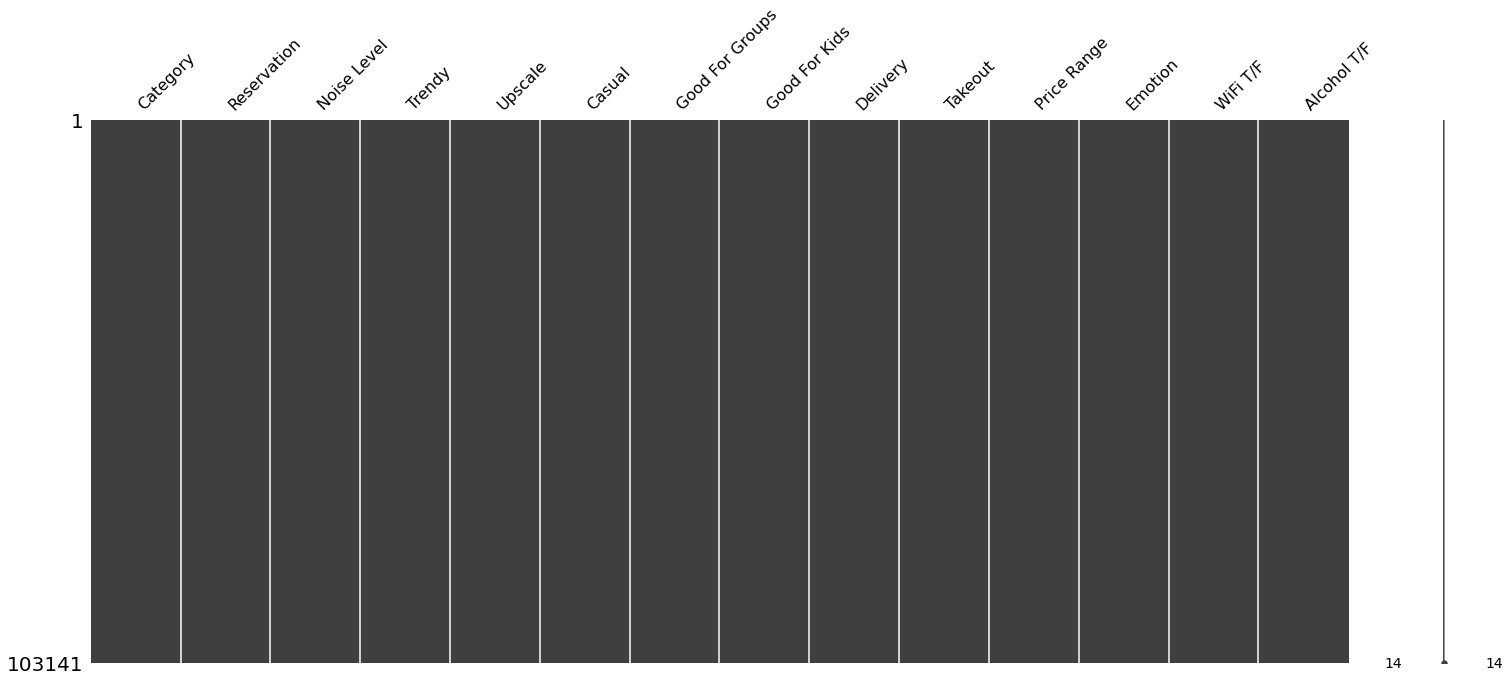

In [14]:
msno.matrix(data)

In [15]:
# Converting Categorical data to numeric data

data['Reservation']=data['Reservation'].map(lambda i:0 if i== 'False' else 1)
data['Trendy']=data['Trendy'].map(lambda i:0 if i== 'False' else 1)
data['Upscale']=data['Upscale'].map(lambda i:0 if i== 'False' else 1)
data['Casual']=data['Casual'].map(lambda i:0 if i== 'False' else 1)
data['Good For Groups']=data['Good For Groups'].map(lambda i:0 if i== 'False' else 1)
data['Good For Kids']=data['Good For Kids'].map(lambda i:0 if i== 'False' else 1)
data['Delivery']=data['Delivery'].map(lambda i:0 if i== 'False' else 1)
data['Takeout']=data['Takeout'].map(lambda i:0 if i== 'False' else 1)
data['WiFi T/F']=data['WiFi T/F'].map(lambda i:0 if i== 'False' else 1)
data['Alcohol T/F']=data['Alcohol T/F'].map(lambda i:0 if i== 'False' else 1)



In [16]:
# For Noise Level and Price I have Normalised both that is range is 0-1

In [17]:
#Noise level
# As logic is the more loud the less numerical weightage, that is number so very loud is 0
data['Noise Level'] = data['Noise Level'].map({'very loud': 0, 'loud': 1, 'average': 2, 'quiet': 3})
 
data['Noise Level']=(data['Noise Level']-data['Noise Level'].min())/(data['Noise Level'].max()-data['Noise Level'].min())     

In [18]:
# Price 
# The more the price the less numeric weightage, so 4 =0
data['Price Range'] = data['Price Range'].map({4: 0, 3: 1, 2: 2, 1: 3})

data['Price Range']=(data['Price Range']-data['Price Range'].min())/(data['Price Range'].max()-data['Price Range'].min())

In [19]:
data.dtypes

Category            object
Reservation          int64
Noise Level        float64
Trendy               int64
Upscale              int64
Casual               int64
Good For Groups      int64
Good For Kids        int64
Delivery             int64
Takeout              int64
Price Range        float64
Emotion             object
WiFi T/F             int64
Alcohol T/F          int64
dtype: object

**EDA**

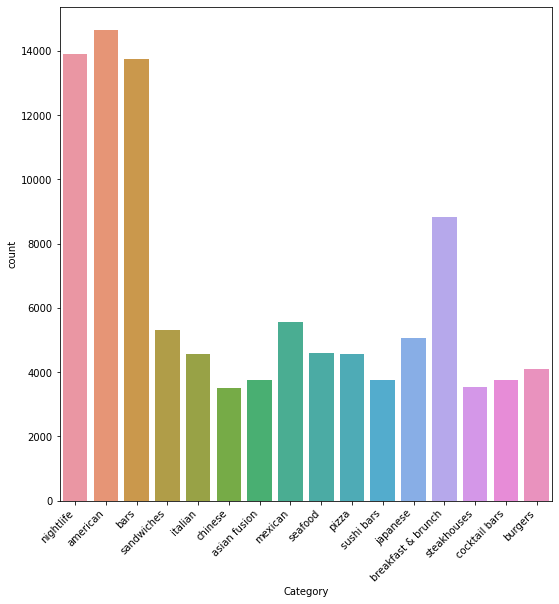

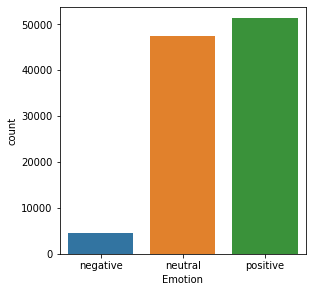

In [20]:
#Category

fig = plt.figure(figsize = (30,20))
ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data =data1, x = 'Category', ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,3,5)
chart=sns.countplot(data = data1, x = 'Emotion', ax=ax1)

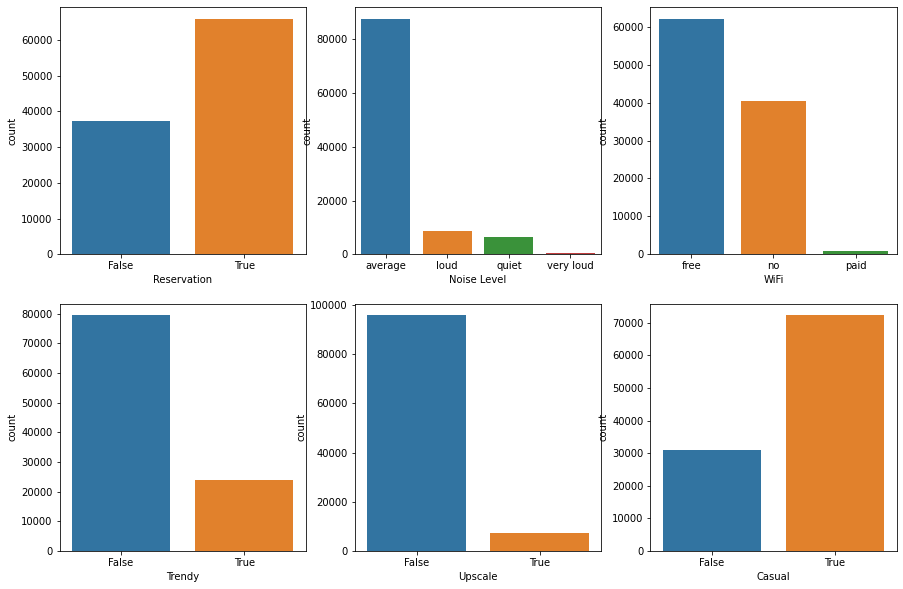

In [21]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data = data1, x = 'Reservation', ax=ax1)

ax1 = fig.add_subplot(2,3,2)
chart=sns.countplot(data = data1, x = 'Noise Level', ax=ax1)

ax1 = fig.add_subplot(2,3,3)
chart=sns.countplot(data = data1, x = 'WiFi', ax=ax1)

ax1 = fig.add_subplot(2,3,4)
chart=sns.countplot(data = data1, x = 'Trendy', ax=ax1)


ax1 = fig.add_subplot(2,3,5)
chart=sns.countplot(data = data1, x = 'Upscale', ax=ax1)


ax1 = fig.add_subplot(2,3,6)
chart=sns.countplot(data = data1, x = 'Casual', ax=ax1)




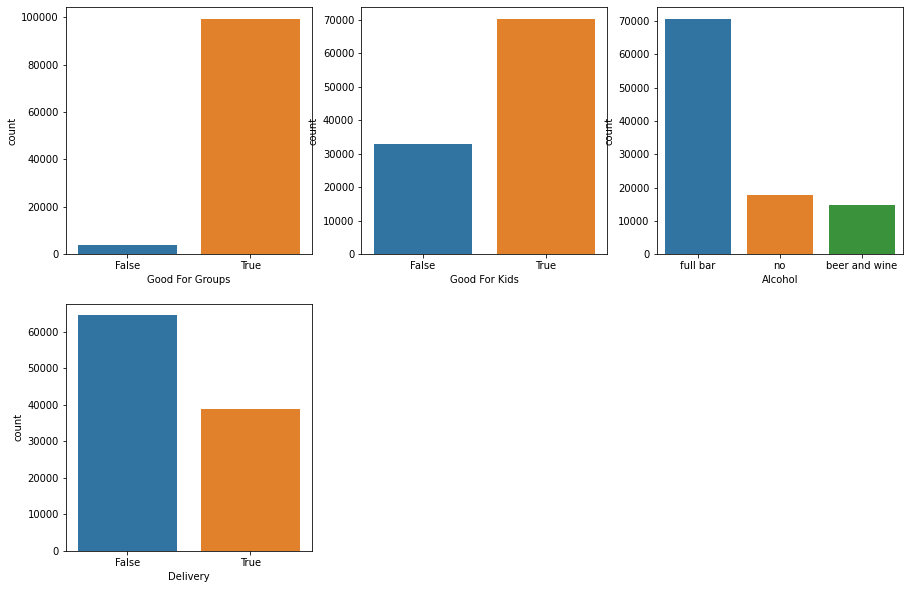

In [22]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data = data1, x = 'Good For Groups', ax=ax1)


ax1 = fig.add_subplot(2,3,2)
chart=sns.countplot(data = data1, x = 'Good For Kids', ax=ax1)

ax1 = fig.add_subplot(2,3,3)
chart=sns.countplot(data = data1, x = 'Alcohol', ax=ax1)


ax1 = fig.add_subplot(2,3,4)
chart=sns.countplot(data = data1, x = 'Delivery', ax=ax1)




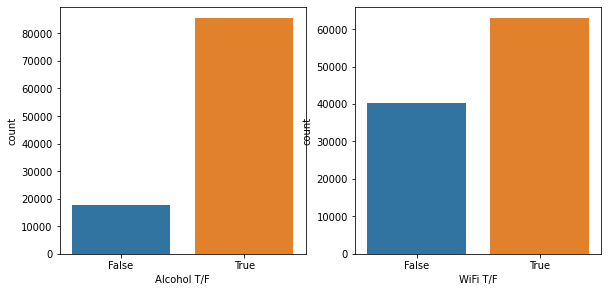

In [23]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data = data1, x = 'Alcohol T/F', ax=ax1)


ax1 = fig.add_subplot(2,3,2)
chart=sns.countplot(data = data1, x = 'WiFi T/F', ax=ax1)


**Model**

In [24]:
#independent and dependent feature
import random

x=data.iloc[:,1:]
y=data.iloc[:,0]

In [25]:
# Performing one hot encoding on Emotion

x=pd.get_dummies(x,drop_first=True)
x.head()

,Reservation,Noise Level,Trendy,Upscale,Casual,Good For Groups,Good For Kids,Delivery,Takeout,Price Range,WiFi T/F,Alcohol T/F,Emotion_neutral,Emotion_positive
0,1,0.666667,1,1,1,1,1,1,1,0.666667,1,1,0,0
1,1,0.666667,1,1,1,1,1,1,1,0.666667,1,1,0,0
2,1,0.666667,1,1,1,1,1,1,1,0.666667,1,1,0,0
3,1,0.333333,1,1,1,1,1,1,1,1.000000,1,1,1,0
4,1,0.666667,1,1,1,1,1,1,1,1.000000,1,1,1,0


In [26]:
y.head()

0     nightlife
1      american
2          bars
3    sandwiches
4    sandwiches
Name: Category, dtype: object

**Random Forest**

In [27]:
random.seed(123)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
print(model.feature_importances_)

[0.         0.24518094 0.         0.         0.         0.
 0.         0.         0.         0.71838971 0.         0.
 0.02042782 0.01600153]


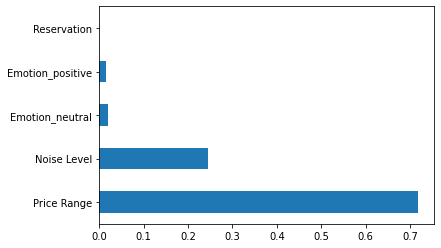

In [29]:

#plot graph of feature importance 

feat_importances= pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [30]:
random.seed(123)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [31]:
print('Train : ', x_train.shape, '\n'
      'Test  : ', x_test.shape)


Train :  (72198, 14) 
Test  :  (30943, 14)


In [32]:
from sklearn import model_selection

random.seed(123)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# predictions
rfc_predict = rfc.predict(x_test)

In [33]:
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score,recall_score

In [34]:
print("=== Confusion Matrix ===")

print(multilabel_confusion_matrix(y_test, rfc_predict, labels= ["american",
                                  "asian fusion","bars","breakfast & brunch",
                                  "burgers","chinese","cocktail bars","italian",
                                  "japanese","mexican","nightlife","pizza",
                                  "sandwiches","seafood","steakhouses","sushi bars"]))

print('\n')
print("=== Accuracy ===")
print(accuracy_score(y_test,rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))


=== Confusion Matrix ===
[[[16315 10211]
  [ 2753  1664]]

 [[29827     0]
  [ 1116     0]]

 [[25133  1698]
  [ 3577   535]]

 [[28187    70]
  [ 2660    26]]

 [[29677     0]
  [ 1266     0]]

 [[29693   212]
  [  993    45]]

 [[29825     3]
  [ 1115     0]]

 [[29488     2]
  [ 1453     0]]

 [[29456     4]
  [ 1483     0]]

 [[29282     3]
  [ 1656     2]]

 [[16805  9944]
  [ 2405  1789]]

 [[29596     8]
  [ 1337     2]]

 [[26309  3048]
  [  953   633]]

 [[29582    22]
  [ 1324    15]]

 [[29136   721]
  [  802   284]]

 [[29887     1]
  [ 1054     1]]]


=== Accuracy ===
0.16145816501308857


=== Classification Report ===


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          american       0.14      0.38      0.20      4417
      asian fusion       0.00      0.00      0.00      1116
              bars       0.24      0.13      0.17      4112
breakfast & brunch       0.27      0.01      0.02      2686
           burgers       0.00      0.00      0.00      1266
           chinese       0.18      0.04      0.07      1038
     cocktail bars       0.00      0.00      0.00      1115
           italian       0.00      0.00      0.00      1453
          japanese       0.00      0.00      0.00      1483
           mexican       0.40      0.00      0.00      1658
         nightlife       0.15      0.43      0.22      4194
             pizza       0.20      0.00      0.00      1339
        sandwiches       0.17      0.40      0.24      1586
           seafood       0.41      0.01      0.02      1339
       steakhouses       0.28      0.26      0.27      1086
        sushi bars       0.50      0.00

**Hyper Parameter tuning**

In [57]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(50, 500, num = 10)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 1, cv = 10, verbose=2, random_state=42, n_jobs = 1)
# Fit the model
rfc_random.fit(x_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.3s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.3s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............
[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.3s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............
[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.4s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............
[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.4s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............
[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.4s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............
[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.3s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............
[CV]  n_estimators=522, max_features=auto, max_depth=300, total=   7.3s
[CV] n_estimators=522, max_features=auto, max_depth=300 ..............

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


{'n_estimators': 522, 'max_features': 'auto', 'max_depth': 300}


In [58]:
rfc = RandomForestClassifier(n_estimators=522, max_depth=300, max_features='sqrt')
rfc.fit(x_train,y_train)
rfc_predict1 = rfc.predict(x_test)


print("=== Confusion Matrix ===")

print(multilabel_confusion_matrix(y_test, rfc_predict1, labels= ["american",
                                  "asian fusion","bars","breakfast & brunch",
                                  "burgers","chinese","cocktail bars","italian",
                                  "japanese","mexican","nightlife","pizza",
                                  "sandwiches","seafood","steakhouses","sushi bars"]))

print('\n')
print("=== Accuracy ===")
print(accuracy_score(y_test,rfc_predict1))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict1))

=== Confusion Matrix ===
[[[16315 10211]
  [ 2753  1664]]

 [[29827     0]
  [ 1116     0]]

 [[25132  1699]
  [ 3577   535]]

 [[28257     0]
  [ 2686     0]]

 [[29677     0]
  [ 1266     0]]

 [[29693   212]
  [  993    45]]

 [[29825     3]
  [ 1115     0]]

 [[29490     0]
  [ 1453     0]]

 [[29459     1]
  [ 1482     1]]

 [[29282     3]
  [ 1656     2]]

 [[16800  9949]
  [ 2405  1789]]

 [[29596     8]
  [ 1337     2]]

 [[26229  3128]
  [  937   649]]

 [[29582    22]
  [ 1324    15]]

 [[29136   721]
  [  802   284]]

 [[29888     0]
  [ 1055     0]]]


=== Accuracy ===
0.16113499014316646


=== Classification Report ===


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          american       0.14      0.38      0.20      4417
      asian fusion       0.00      0.00      0.00      1116
              bars       0.24      0.13      0.17      4112
breakfast & brunch       0.00      0.00      0.00      2686
           burgers       0.00      0.00      0.00      1266
           chinese       0.18      0.04      0.07      1038
     cocktail bars       0.00      0.00      0.00      1115
           italian       0.00      0.00      0.00      1453
          japanese       0.50      0.00      0.00      1483
           mexican       0.40      0.00      0.00      1658
         nightlife       0.15      0.43      0.22      4194
             pizza       0.20      0.00      0.00      1339
        sandwiches       0.17      0.41      0.24      1586
           seafood       0.41      0.01      0.02      1339
       steakhouses       0.28      0.26      0.27      1086
        sushi bars       0.00      0.00

**XG Boost**

In [37]:
from xgboost import XGBClassifier

In [38]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
# make predictions for test data
y_pred = model.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))

Accuracy: 16.16%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          american       0.14      0.35      0.20      4417
      asian fusion       0.00      0.00      0.00      1116
              bars       0.24      0.13      0.17      4112
breakfast & brunch       0.27      0.01      0.02      2686
           burgers       0.00      0.00      0.00      1266
           chinese       0.18      0.04      0.07      1038
     cocktail bars       0.00      0.00      0.00      1115
           italian       0.00      0.00      0.00      1453
          japanese       0.00      0.00      0.00      1483
           mexican       0.40      0.00      0.01      1658
         nightlife       0.15      0.45      0.23      4194
             pizza       0.00      0.00      0.00      1339
        sandwiches       0.17      0.40      0.24      1586
           seafood       0.50      0.01      0.02      1339
       steakhouses       0.28      0.26      0.27      1086
        sushi bars       0.50      0.00

In [43]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train)

cl=clf.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, cl)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, cl))

Accuracy: 16.08%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          american       0.14      0.38      0.20      4417
      asian fusion       0.00      0.00      0.00      1116
              bars       0.24      0.13      0.17      4112
breakfast & brunch       0.00      0.00      0.00      2686
           burgers       0.00      0.00      0.00      1266
           chinese       0.18      0.04      0.07      1038
     cocktail bars       0.00      0.00      0.00      1115
           italian       0.00      0.00      0.00      1453
          japanese       0.00      0.00      0.00      1483
           mexican       0.40      0.00      0.00      1658
         nightlife       0.15      0.42      0.22      4194
             pizza       0.20      0.00      0.00      1339
        sandwiches       0.17      0.41      0.24      1586
           seafood       0.50      0.01      0.02      1339
       steakhouses       0.28      0.26      0.27      1086
        sushi bars       0.50      0.00

**SVM**

In [51]:
from sklearn import svm

In [52]:
clf1 = svm.SVC(kernel='linear', C = 1.0)

In [53]:
clf1.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
c=clf1.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test, c)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, c))

Accuracy: 15.35%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          american       0.14      0.67      0.23      4417
      asian fusion       0.00      0.00      0.00      1116
              bars       0.00      0.00      0.00      4112
breakfast & brunch       0.00      0.00      0.00      2686
           burgers       0.00      0.00      0.00      1266
           chinese       0.00      0.00      0.00      1038
     cocktail bars       0.00      0.00      0.00      1115
           italian       0.00      0.00      0.00      1453
          japanese       0.00      0.00      0.00      1483
           mexican       0.05      0.00      0.01      1658
         nightlife       0.20      0.26      0.22      4194
             pizza       0.00      0.00      0.00      1339
        sandwiches       0.18      0.45      0.25      1586
           seafood       0.00      0.00      0.00      1339
       steakhouses       0.00      0.00      0.00      1086
        sushi bars       0.00      0.00